**Association Rule-Based Recommender System**

ARL(Association Rule Learning) is ruled based recommendation systems that use "Apriori Algorithm" to recommend content, products, services, etc. to users.



We will use this algorithm and calculate the requirements for this methodlogy like; support, confidence and lift values

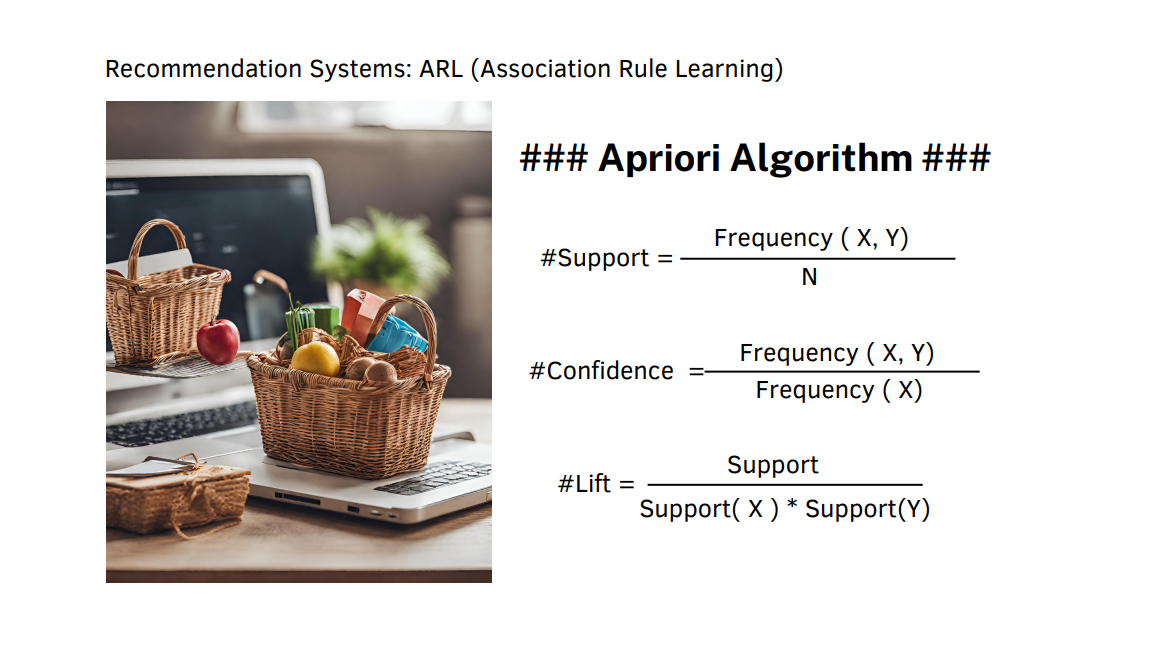

In [1]:
from IPython.display import Image
Image(filename='/kaggle/input/arl-image/arl.png')

Armut is the most important online service platform brings together service providers and services in Turkey. It enables easy access to services such as cleaning, renovation and transportation with just a few taps on your computer or smartphone.

We have a dataset containing the users who received services, the categories of these services and order times.
It is intended to create a product recommendation system using Association Rule Learning from this dataset



Let's start with uploading the dataset and making some arrangements;

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
df_ = pd.read_csv("/kaggle/input/armut-data/armut_data.csv")
df = df_.copy()
df.head()

,UserId,ServiceId,CategoryId,CreateDate
0,25446,4,5,2017-08-06 16:11:00
1,22948,48,5,2017-08-06 16:12:00
2,10618,0,8,2017-08-06 16:13:00
3,7256,9,4,2017-08-06 16:14:00
4,25446,48,5,2017-08-06 16:16:00


In [4]:
# UserId: Customer number
# ServiceId: Services belong to category 
# CategoryId: Categories like cleaning,transportation.. etc. 
# CreateDate: Date the service was purchesed

Is there any empty value?

In [5]:
df.isnull().sum()

UserId        0
ServiceId     0
CategoryId    0
CreateDate    0
dtype: int64

Let's check the shape;

In [6]:
df.shape

(162523, 4)

Create a variable by combining ServiceID and CategoryID with "_";

In [7]:
df["Hizmet"] = df["ServiceId"].astype(str) + "_" + df["CategoryId"].astype(str)
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Hizmet
0,25446,4,5,2017-08-06 16:11:00,4_5
1,22948,48,5,2017-08-06 16:12:00,48_5
2,10618,0,8,2017-08-06 16:13:00,0_8
3,7256,9,4,2017-08-06 16:14:00,9_4
4,25446,48,5,2017-08-06 16:16:00,48_5


We create a new date variable containing the year and month.
Combine UserID and the date variable you just created with "_" and assign it to a new variable with ID;


In [8]:
 df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162523 entries, 0 to 162522
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   UserId      162523 non-null  int64 
 1   ServiceId   162523 non-null  int64 
 2   CategoryId  162523 non-null  int64 
 3   CreateDate  162523 non-null  object
 4   Hizmet      162523 non-null  object
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


In [9]:
df["CreateDate"] = df["CreateDate"].apply(pd.to_datetime)

In [10]:
df['YearMonth'] = df['CreateDate'].dt.to_period('M')
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Hizmet,YearMonth
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08


In [11]:
df["SepetID"] = df["UserId"].astype(str) + "_" + df["YearMonth"].astype(str)
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Hizmet,YearMonth,SepetID
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08,25446_2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08,22948_2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08,10618_2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08,7256_2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08,25446_2017-08


Let's check the service;

In [12]:
def Sepet_ID(dataframe, Hizmet):
    return dataframe[dataframe["Hizmet"] == Hizmet]


result = Sepet_ID(df, '48_5')
print(result)

        UserId  ServiceId  CategoryId          CreateDate Hizmet YearMonth        SepetID
1        22948         48           5 2017-08-06 16:12:00   48_5   2017-08  22948_2017-08
4        25446         48           5 2017-08-06 16:16:00   48_5   2017-08  25446_2017-08
13        9036         48           5 2017-08-06 16:56:00   48_5   2017-08   9036_2017-08
14       17982         48           5 2017-08-06 16:57:00   48_5   2017-08  17982_2017-08
18       14655         48           5 2017-08-06 17:18:00   48_5   2017-08  14655_2017-08
...        ...        ...         ...                 ...    ...       ...            ...
161953   24763         48           5 2018-08-01 16:10:00   48_5   2018-08  24763_2018-08
162036   18654         48           5 2018-08-02 07:56:00   48_5   2018-08  18654_2018-08
162070    3272         48           5 2018-08-02 10:41:00   48_5   2018-08   3272_2018-08
162354   14213         48           5 2018-08-04 15:59:00   48_5   2018-08  14213_2018-08
162375   2



# # **Create Association Rules:**



In [13]:
df_s = df.groupby(["SepetID", "Hizmet"])["Hizmet"].count().unstack().fillna(0). \
    applymap(lambda x: 1 if x > 0 else 0)

df_s.head()

Hizmet,0_8,10_9,11_11,12_7,13_11,14_7,15_1,16_8,17_5,18_4,19_6,1_4,20_5,21_5,22_0,23_10,24_10,25_0,26_7,27_7,28_4,29_0,2_0,30_2,31_6,32_4,33_4,34_6,35_11,36_1,37_0,38_4,39_10,3_5,40_8,41_3,42_1,43_2,44_0,45_6,46_4,47_7,48_5,49_1,4_5,5_11,6_7,7_3,8_5,9_4
SepetID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0_2017-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
0_2017-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
0_2018-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
0_2018-04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10000_2017-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


This algorithm helps detect trends in products being purchased together.

In [14]:
frequent_itemsets = apriori(df_s, 
                            min_support=0.01,
                            use_colnames=True) 

/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


**SUPPORT**: selling X + Y together

**CONFIDENCE:** when x is sold the selling rate of Y

**LIFT:** When X is sold, the selling rate of Y increases by lift

In [15]:
rules = association_rules(frequent_itemsets,
                          metric="support",
                          min_threshold=0.01)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(13_11),(2_0),0.056627,0.130286,0.012819,0.226382,1.737574,0.005442,1.124216,0.449965
1,(2_0),(13_11),0.130286,0.056627,0.012819,0.098394,1.737574,0.005442,1.046325,0.488074
2,(15_1),(2_0),0.120963,0.130286,0.033951,0.280673,2.154278,0.018191,1.209066,0.609539
3,(2_0),(15_1),0.130286,0.120963,0.033951,0.260588,2.154278,0.018191,1.188833,0.616073
4,(33_4),(15_1),0.027310,0.120963,0.011233,0.411311,3.400299,0.007929,1.493211,0.725728


In [16]:
rules[(rules["support"] > 0.081) & (rules["confidence"] > 0.5) | (rules["lift"] > 3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(33_4),(15_1),0.027310,0.120963,0.011233,0.411311,3.400299,0.007929,1.493211,0.725728
5,(15_1),(33_4),0.120963,0.027310,0.011233,0.092861,3.400299,0.007929,1.072262,0.803047
10,(22_0),(25_0),0.047515,0.042895,0.011120,0.234043,5.456141,0.009082,1.249553,0.857462
11,(25_0),(22_0),0.042895,0.047515,0.011120,0.259247,5.456141,0.009082,1.285834,0.853324
18,(9_4),(38_4),0.041393,0.066568,0.010067,0.243216,3.653623,0.007312,1.233418,0.757661
19,(38_4),(9_4),0.066568,0.041393,0.010067,0.151234,3.653623,0.007312,1.129413,0.778096


In [17]:
rules[(rules["support"] > 0.1) & (rules["confidence"] > 0.5) | (rules["lift"] > 5)]. \
    sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(25_0),(22_0),0.042895,0.047515,0.01112,0.259247,5.456141,0.009082,1.285834,0.853324
10,(22_0),(25_0),0.047515,0.042895,0.01112,0.234043,5.456141,0.009082,1.249553,0.857462


Use the arl_recommender function to recommend a service to a user who last received the 2_0 service;

In [18]:
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]

Lets check the first five recommendations;

In [19]:
arl_recommender(rules, "2_0", 5)

['22_0', '25_0', '15_1', '13_11', '38_4']